Question: 1
What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.
Answer:
Anomaly Detection is the process of identifying data points, events, or patterns that deviate significantly from the expected or normal behavior of a dataset. These anomalies often indicate rare events, errors, fraud, or system faults.

Types of anomalies:

Point Anomaly
A single observation that is very different from the rest of the data.
Example: A sudden bank transaction of ₹5,00,000 when a user’s usual transactions are around ₹2,000.

Contextual Anomaly
An observation that is anomalous only in a specific context such as time, season, or location.
Example: Electricity consumption being very high at midnight for a household (normal during daytime, abnormal at night).

Collective Anomaly
A group of related data points that together represent abnormal behavior.
Example: A continuous sequence of small but unusual network packets indicating a DDoS attack.

Question: 2
Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.
Answer:

Isolation Forest

Approach: Isolates anomalies by randomly partitioning data. Anomalies are easier to isolate and require fewer splits.

Use cases: Large datasets, high-dimensional data, fraud detection, anomaly detection where labels are not available.

DBSCAN

Approach: Density-based clustering. Points in low-density regions are treated as outliers.

Use cases: Spatial data, datasets with clusters of arbitrary shape, detecting noise points.

Local Outlier Factor (LOF)

Approach: Measures local density deviation of a point compared to its neighbors.

Use cases: When anomalies are relative to local neighborhoods, such as detecting abnormal behavior within similar user groups.

Question: 3
What are the key components of a Time Series? Explain each with one example.
Answer:

Trend
Long-term increase or decrease in data over time.
Example: Gradual increase in online shopping sales over several years.

Seasonality
Regular, repeating patterns over a fixed period.
Example: Higher ice cream sales during summer every year.

Cyclic Component
Fluctuations occurring over long, irregular periods, often influenced by economic conditions.
Example: Business growth and recession cycles.

Irregular (Noise)
Random variations that do not follow any pattern.
Example: Sudden sales drop due to unexpected weather or system outage.

Question: 4
Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?
Answer:
A time series is stationary if its statistical properties such as mean, variance, and autocorrelation remain constant over time.

Testing stationarity:

Visual inspection (constant mean and variance over time)

Statistical tests like the Augmented Dickey-Fuller (ADF) test

Transforming a non-stationary series into stationary:

Differencing: Subtracting the previous value from the current value

Log or power transformation: Stabilizes variance

Removing trend or seasonality: Using decomposition methods

Question: 5
Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.
Answer:

AR (AutoRegressive)
Uses past values of the time series to predict future values.
Application: When data depends strongly on its own past values.

MA (Moving Average)
Uses past forecast errors to model the time series.
Application: Useful when errors show a pattern over time.

ARIMA
Combines AR, MA, and differencing to handle non-stationary data.
Application: General-purpose time series forecasting.

SARIMA
Extends ARIMA by incorporating seasonal components.
Application: Data with strong seasonality such as monthly sales.

SARIMAX
SARIMA with external (exogenous) variables included.
Application: Forecasting influenced by additional factors like holidays, promotions, or weather.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

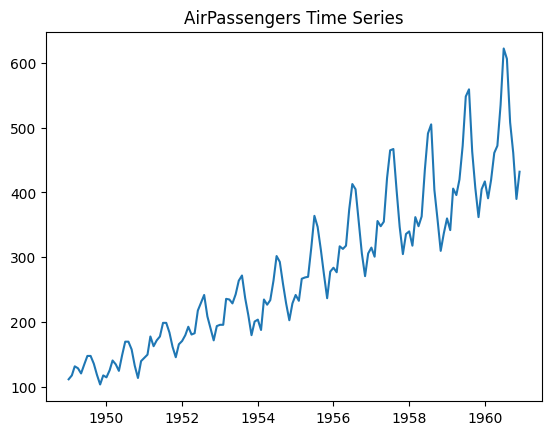

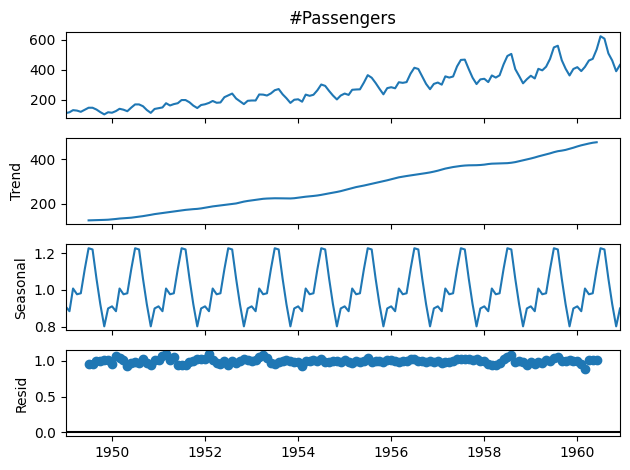

In [13]:
#Question 6:Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components
from statsmodels.tsa.seasonal import seasonal_decompose
air_passengers = pd.read_csv("AirPassengers.csv")
air_passengers["Month"] = pd.to_datetime(air_passengers["Month"])
air_passengers = air_passengers.set_index("Month")
plt.figure()
plt.plot(air_passengers["#Passengers"])
plt.title("AirPassengers Time Series")
plt.show()
result = seasonal_decompose(
    air_passengers["#Passengers"],
    model="multiplicative",
    period=12
)
result.plot()
plt.show()

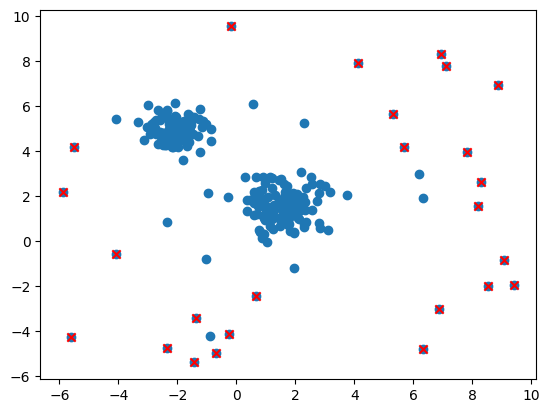

In [46]:
#Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.
#using healthcare.csv dataset
from sklearn.ensemble import IsolationForest
df = pd.read_csv("healthcare.csv")
model = IsolationForest(contamination = 0.1)
model.fit(df)
pred = model.predict(df)
index = np.where(pred<0)
x = df.values
plt.scatter(df["0"],df["1"])
plt.scatter(x[index,0],x[index,1],color="red",marker="x")

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


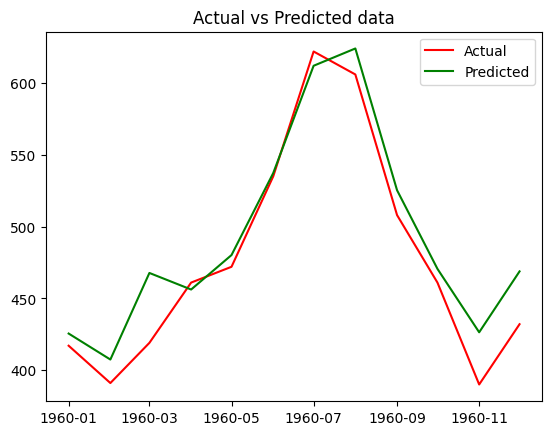

In [22]:
#Question 8: Train a SARIMA model on the monthly airline passengers dataset.Forecast the next 12 months and visualize the results.
import statsmodels.api as sm
train_data = air_passengers[:-12]
test_data = air_passengers[-12:]
model  = sm.tsa.statespace.SARIMAX(train_data["#Passengers"], order = (0,1,0), seasonal_order = (1,1,1,12))
model_fit = model.fit()
pred = model_fit.forecast(steps=12)
plt.title("Actual vs Predicted data")
plt.plot(test_data.index,test_data['#Passengers'],color="red", label="Actual")
plt.plot(test_data.index,pred,color="green",label="Predicted")
plt.legend()

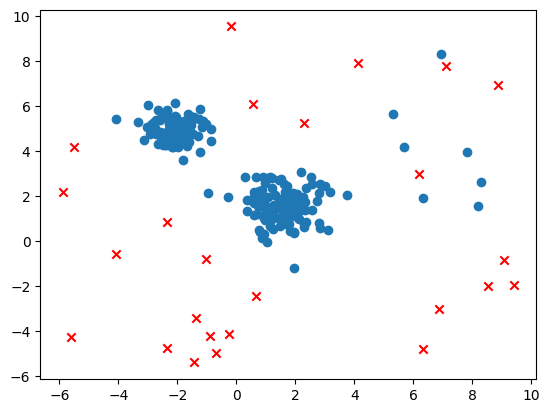

In [36]:
#Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.
from sklearn.neighbors import LocalOutlierFactor
model = LocalOutlierFactor(contamination = 0.1, n_neighbors = 20)
df = pd.read_csv("healthcare.csv")
y_pred = model.fit_predict(df)
x_inliers = df[y_pred==1]
x_outliers = df[y_pred == -1]
plt.scatter(x_inliers["0"],x_inliers["1"])
plt.scatter(x_outliers["0"],x_outliers["1"],c="red",marker="x")

Question: 10
You are working as a data scientist for a power grid monitoring company. Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset includes features like timestamp, region, weather conditions, and energy usage. Explain your real-time data science workflow.

Answer:
1. Anomaly Detection Approach

For real-time anomaly detection, Isolation Forest would be used.

Isolation Forest is suitable for streaming energy data because it efficiently identifies rare and abnormal consumption patterns without assuming any underlying data distribution. The model is trained on historical normal energy usage data and then applied to incoming 15-minute interval data points. If a data point is isolated in fewer splits, it is flagged as an anomaly.

This method helps detect sudden spikes or drops in energy usage caused by equipment failure, power theft, or unexpected demand changes.

2. Time Series Model for Short-Term Forecasting

For short-term energy demand forecasting, SARIMAX is the preferred model.

SARIMAX captures seasonal patterns such as daily and weekly cycles and allows the inclusion of external variables like weather conditions and regional information. Since energy demand is strongly influenced by temperature and time of day, SARIMAX produces more accurate forecasts compared to ARIMA or SARIMA.

3. Validation and Performance Monitoring

Validation is done using time-based train–test splits and rolling (walk-forward) validation to simulate real-time forecasting conditions.

Forecasting performance is measured using metrics such as RMSE and MAE. Anomaly detection performance is monitored by tracking the frequency and severity of detected anomalies over time.

Models are periodically retrained to handle concept drift caused by seasonal changes or evolving consumption behavior.

4. Business and Operational Impact

Enables early detection of abnormal energy consumption, preventing grid overloads and failures.

Improves short-term demand forecasting for better power generation and load balancing.

Reduces operational costs by optimizing resource allocation.

Supports real-time decision-making through automated alerts and monitoring dashboards.